In [1]:
from os import environ

input_folder = environ.get(
    'CROSSCOMPUTE_INPUT_FOLDER', 'tests/standard/input')
output_folder = environ.get(
    'CROSSCOMPUTE_OUTPUT_FOLDER', 'tests/standard/output')

In [2]:
import json
from os.path import join

settings_path = join(input_folder, 'settings.json')
settings = json.load(open(settings_path, 'rt'))
name = settings['name']
name

'1935 S Campbell Ave, Springfield, MO 65807, EE. UU.'

In [22]:
from glob import glob

electricity_network_path = glob('*.json')[0]
electricity_network = json.load(open(electricity_network_path, 'rt'))

In [4]:
asset_dictionaries = [_ for _ in electricity_network['assets']['assetById'].values()]
names = [_['name'] for _ in asset_dictionaries if _['typeCode'] == 'l']
names

['1908 S Wedgewood Ave, Springfield, MO 65807, EE. UU.',
 '1909 S Campbell Ave, Springfield, MO 65807, EE. UU.',
 '1935 S Campbell Ave, Springfield, MO 65807, EE. UU.']

In [5]:
open('result-batch.txt', 'wt').write('\n'.join(names))

156

In [6]:
for d in asset_dictionaries:
    if d['name'] == name:
        break

In [7]:
d

{'id': 'lBz59s4rXlBWwyDc1611783563270',
 'utilityId': '',
 'typeCode': 'l',
 'attributes': {'lineType': 'default',
  'power flow p0': 100.52985065358615,
  'power flow p1': -99.99999999456968,
  'power flow q0': 105.29850658117857,
  'power flow q1': -99.99999999101387,
  'outage risk hasElectricity': 1},
 'name': '1935 S Campbell Ave, Springfield, MO 65807, EE. UU.',
 'connections': {'0': {'busId': 'XlIDay8TpgVgBFMMUi10Fn5pV8xWZsHQ1611783548758'},
  '1': {'busId': 'BP2N7iELFpSp7zb6il6WanRC4L7P9HLf1611783556818'}},
 'vertexCount': 2}

In [18]:
import pandas as pd

t = pd.Series(d['attributes']).to_frame()
t.columns = ['value']
t.to_csv(join(output_folder, 'settings.csv'))

<AxesSubplot:>

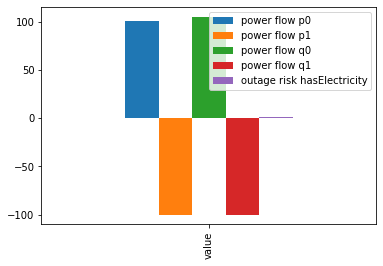

In [38]:
p = t.transpose().plot.bar()
p

In [39]:
import matplotlib.pyplot as plt
plt.savefig(join(output_folder, 'plot.png'))

<Figure size 432x288 with 0 Axes>

In [9]:
import json
json.dump({
    'name': name,
    'type': {
        'g': 'Generator',
        'l': 'Line',
        'm': 'Meter',
    }[d['typeCode']],
}, open(join(output_folder, 'settings.json'), 'wt'))

In [10]:
# import shutil
# shutil.copy(electricity_network_path, join(output_folder, 'power-flow.json'))

In [11]:
import geojson
geojson.dump(electricity_network['assets']['assetsGeoJson'], open(join(
    output_folder, 'electricity-network.json'), 'wt'))